In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
df_red = pd.read_csv('winequality-red.csv')

In [3]:
df_white = pd.read_csv('winequality-white.csv')

In [4]:
# Add a new column to each dataframe to indicate the type of wine
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine the dataframes
df = pd.concat([df_red, df_white], ignore_index=True)

# Display the combined dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


The code performs three main operations to prepare a combined wine dataset:

1. **Adding Wine Type Labels**
   - Creates a new column called 'type' in the red wine DataFrame (`df_red`)
   - Assigns the value 'red' to all rows in this column
   - Similarly adds a 'type' column to the white wine DataFrame (`df_white`)
   - Assigns the value 'white' to all rows in this column
   - This labeling helps distinguish between red and white wines after combining

2. **Combining Datasets**
   - Uses pandas' `concat()` function to merge the red and white wine DataFrames
   - Takes a list of DataFrames `[df_red, df_white]` as input
   - The `ignore_index=True` parameter resets the index of the combined DataFrame
   - This prevents duplicate index values from the original DataFrames
   - Creates a new DataFrame `df` containing all rows from both wine datasets

3. **Previewing Results**
   - Calls `head()` to display the first 5 rows of the combined DataFrame
   - Useful for verifying the merge operation was successful
   - Confirms the 'type' column is present and properly populated

In [5]:
# Separate features and target variable
X = df.iloc[:, 0:11]  # Features from columns 0 to 10, alcohol is column 10
y = df.iloc[:, 11]    # Target variable from column 11, quality is the target variable

This code splits the wine dataset into features and the target variable. Features start from fixed acidity until alcohol as the last column.

- Uses pandas' `iloc` indexer to select data using integer positions
- Selects all rows (`:`) and columns 0 through 10 (`0:11`)
- Includes wine characteristics like acidity, pH, sulfates, etc.
- The last feature (column 10) is alcohol content

The second line extracts the target variable. Target variable is quality.

- Selects all rows and only column 11
- Contains the wine quality ratings
- Will be used as the prediction target for the model

This is essential in machine learning workflows as it prepares data in the format expected by most ML algorithms - separate feature and target variables.

In [6]:
# Split the data into training and remaining data (30% of the original data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation and test sets (each 15% of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the sizes of the splits
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 4547
Validation set size: 975
Test set size: 975


This code performs a two-stage split of the dataset to create training, validation, and test sets.

#### First Split
The first line splits the data into two parts:
- Training data (`X_train`, `y_train`): 70% of the original data
- Temporary data (`X_temp`, `y_temp`): 30% of the original data
- Uses `random_state=42` for reproducibility
- The split is performed on both features (`X`) and target variables (`y`) simultaneously

#### Second Split
The second line further divides the temporary data:
- Validation data (`X_val`, `y_val`): Half of the temporary data (15% of original)
- Test data (`X_test`, `y_test`): Other half (15% of original)
- Uses the same random state for consistency
- This creates the final validation and test sets

#### Size Verification
The code then prints the size of each split using f-strings:
- Accesses the number of rows using `.shape[0]`
- Helps verify the splits were done correctly


This is standard practice in machine learning to ensure proper model evaluation and avoid data leakage between training, validation, and final testing.

In [7]:
# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

Alpha: 0.0
	Coefficients: [ 0.10311247 -0.22412306 -0.02201945  0.23367211 -0.00192778  0.12110596
 -0.14893833 -0.18557741  0.07346751  0.11875887  0.32548372]
	Intercept: 5.820101165603701
	Training accuracy (R2): 0.2998754182892185
	Validation accuracy (R2): 0.2783802129030455
Alpha: 0.1
	Coefficients: [ 0.10306944 -0.22412224 -0.02201321  0.23360929 -0.00193827  0.1210979
 -0.14892184 -0.18549463  0.07344137  0.11874805  0.32550985]
	Intercept: 5.820101165603701
	Training accuracy (R2): 0.29987541735756285
	Validation accuracy (R2): 0.27838310921596054
Alpha: 0.5
	Coefficients: [ 0.10289785 -0.22411887 -0.02198828  0.23335872 -0.00198016  0.12106566
 -0.14885601 -0.18516462  0.07333711  0.11870488  0.32561387]
	Intercept: 5.820101165603701
	Training accuracy (R2): 0.2998753950802735
	Validation accuracy (R2): 0.27839466645818256
Alpha: 1.0
	Coefficients: [ 0.10268451 -0.2241144  -0.02195713  0.23304711 -0.00203233  0.12102538
 -0.14877396 -0.18475459  0.0732075   0.11865118  0.3257

This code implements a grid search over different regularization parameters (alpha values) for Ridge regression. It uses both training and validation sets to find the optimal regularization strength.

The variables max_R2, best_alpha, and best_mdl track the best performing model configuration:
- `max_R2`: Stores the highest validation R² score
- `best_alpha`: Stores the alpha value that produced the best score
- `best_mdl`: Stores the best performing model

The code iterates through different alpha values `[0, 0.1, 0.5, 1, 5, 10, 50, 100]`. For each value:

1. Creates a pipeline combining:
   - `StandardScaler()`: Normalizes the features
   - `Ridge(alpha=alpha)`: Ridge regression with current alpha value

2. Evaluates model performance:
   - Calculates R² score on training data
   - Calculates R² score on validation data
   - Prints model coefficients, intercept, and performance metrics

3. Updates best model tracking:
   - If current validation R² exceeds previous best
   - Stores current alpha, R², and model


This is common in machine learning for finding optimal hyperparameters while avoiding overfitting.

Best alpha: 100.0
Coefficients: [ 0.07575883 -0.22001801 -0.016257    0.19262076 -0.00977126  0.11357875
 -0.1358943  -0.13630318  0.05703328  0.11148799  0.33662676]
Intercept: 5.820101165603699
Testing accuracy (R2) of Best Model: 0.2653444439582907


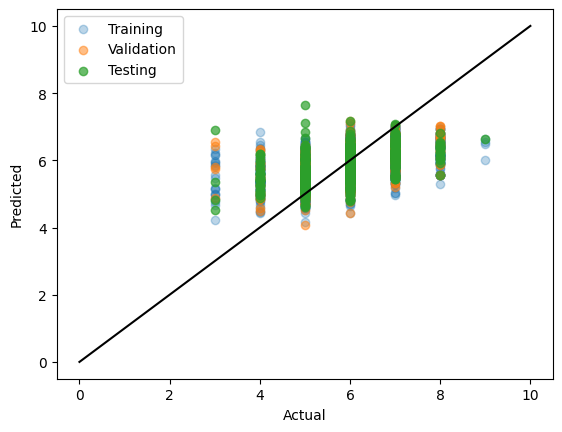

In [8]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 10]),np.array([0, 10]),color='k',label='_nolegend_')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



The code first prints key information about the best performing model:
- The optimal alpha (regularization parameter)
- The model coefficients for each feature
- The intercept term (bias)

The code then evaluates the model's performance on the test set:
- Calculates and prints the R² score on the test data
- Makes predictions on all three data splits (train, validation, test)
- These predictions will be used for visualization

A scatter plot is created to compare actual vs predicted values:

1. **Reference Line**
   - Draws a diagonal black line from (0,0) to (10,10)
   - Represents perfect predictions where actual equals predicted
   - Uses `label='_nolegend_'` to exclude it from the legend

2. **Data Points**
   - Training data: Light opacity (alpha=0.3)
   - Validation data: Medium opacity (alpha=0.5)
   - Test data: High opacity (alpha=0.7)
   - Different opacities help distinguish the three sets

3. **Plot Formatting**
   - Adds axis labels ("Actual" and "Predicted")
   - Includes a legend to identify each dataset
   - Uses `plt.show()` to display the plot

This visualization is common in regression analysis to assess model performance across different data splits.